In [194]:
from ai.train import TrainNNConfig
import torch

In [98]:
z = torch.load('/mnt/ssd3/user/spock/projects/AI/experiments/next_token/Transformer/v4/checkpoints/epoch0__step200.ckpt')
z['optimizer_states'][0]['param_groups']

In [93]:
from ai.train import TrainNNConfig
%load_ext autoreload
%autoreload 2
config = TrainNNConfig.from_yaml_file('/mnt/ssd3/user/spock/projects/AI/experiments/next_token/WaveNet/shuffle_v2/train.config')
config = TrainNNConfig.from_yaml_file('/mnt/ssd3/user/spock/projects/AI/experiments/next_token/SimpleLSTM/v1/train.config')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [195]:
!ls /mnt/ssd3/user/spock/projects/AI/experiments/next_token/Transformer/v5//checkpoints/epoch0__step7000.ckpt

ls: cannot access '/mnt/ssd3/user/spock/projects/AI/experiments/next_token/Transformer/v5//checkpoints/epoch0__step7000.ckpt': No such file or directory


In [184]:
config = TrainNNConfig.from_yaml_file('/mnt/ssd3/user/spock/projects/AI/experiments/next_token/Transformer/v5/train.config')
dm = config.datamodule.i()
dm.prepare_data()
model_class = config.lightning_module.get_target()
model = model_class.load_from_checkpoint('/mnt/ssd3/user/spock/projects/AI/experiments/next_token/Transformer/v5//checkpoints/epoch0__step7250.ckpt')
x,y = next(iter(dm.train_dataloader()))
model = model.to('cpu')
model.eval()
with torch.inference_mode():
    y_hat = model(x)
    y_hat.shape

2023-11-26 10:53:29.552 | INFO     | ai.datamodule.text:prepare_data:76 - Creating datasets...


In [192]:
# dm.train_dataloader.d
g = model.generate(x[:2], 2000)
print(''.join(dm.ds_train.decode(g[0])))

 thy a'rmour ten
To do ill buy thee full brought, as thou shalt,
And avoided a kingdom, wilt be conscience.
Do not so demand, Warwick, good queen.

CLARENCE:
Your lordship and dance sweet.
Therefore me Doricle, master not cutcher enclaim
To chose biins of mine execution,
Who can they on, they would be seen of them:
They do fear upon my soul promise of treasons,
Whereins to have deserved and bear it.

QUEEN MARGARET:
Setting fill'd honour body on,
That she's own nothing babe.

First Murderer:
His, my dearer sorrow;
But a while at our affairs rights of many so,
Yet is; where's pilgrimage is well in the wedding of discourse;
Until have wash'd at sea.

CLIFFORD:
O God's mother!

NORFOLK:
By heavy captain: there is the greatest and the duke
That city a man that midst death. Bring children,
Which is the fame of my full of the law,
Lest my mooning dragon of my stitue,
Which this stars is my bhost tale time best,
The Edward that kill'd and slain.

QUEEN MARGARET:
O much devotion! why doth have

/tmp/ipykernel_3670387/2753359079.py:11: RuntimeWarning: divide by zero encountered in log
  ax.imshow(np.log(head.last_attn_map[0])) # 0 is first element in batch


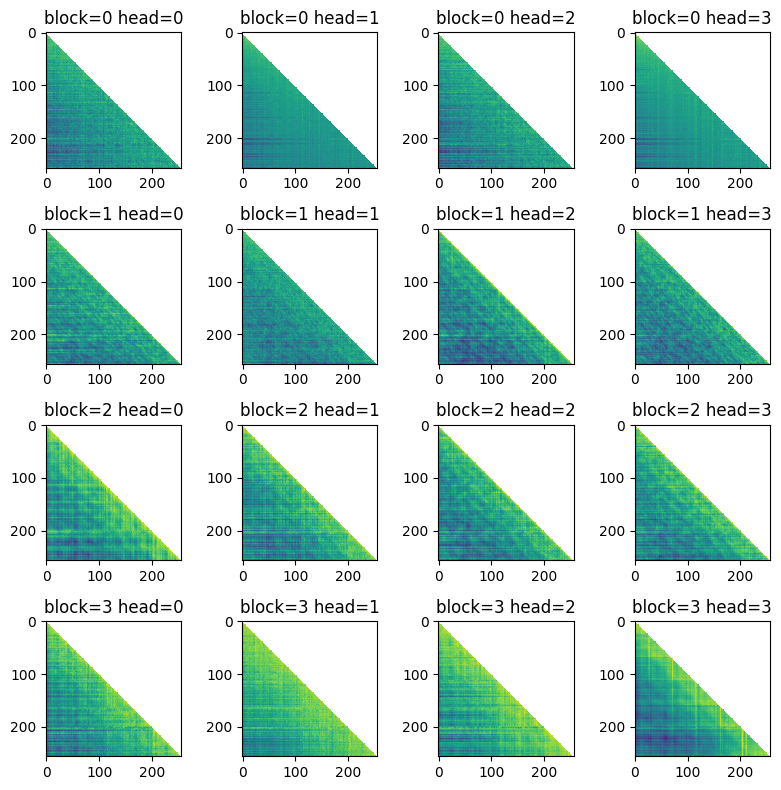

In [186]:
import numpy as np
n_blocks = len(model.model.blocks)
n_heads = len(block.mha.heads)
fig, axes = plt.subplots(n_blocks, n_heads, figsize=(8,8))

for i in range(n_blocks):
    for j in range(n_heads):
        ax = axes[i,j]
        block = model.model.blocks[i]
        head = block.mha.heads[j]
        ax.imshow(np.log(head.last_attn_map[0])) # 0 is first element in batch
        ax.set_title(f'block={i} head={j}')
fig.tight_layout()
# list(block.named_parameters())

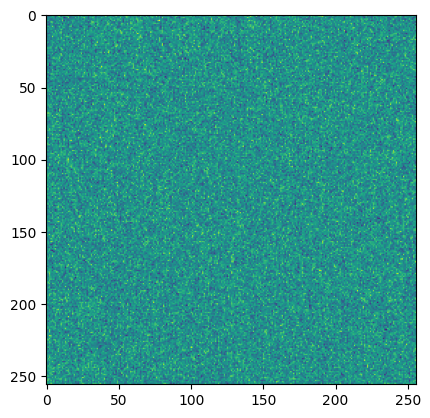

In [188]:
import matplotlib.pyplot as plt
plt.imshow(model.model.position_embedding_table.weight.detach().numpy())

In [196]:
def plot_char_embeddings(embeddings: torch.Tensor, char_vocab):
    """
    Plot character embeddings
    """
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt

    pca = PCA(n_components=2)
    embeddings = pca.fit_transform(embeddings)
    fig, ax = plt.subplots()
    ax.scatter(embeddings[:, 0], embeddings[:, 1])
    for i, char in enumerate(char_vocab):
        ax.annotate(char, (embeddings[i, 0], embeddings[i, 1]))
    plt.show()

In [238]:
!poetry add seaborn

Using version ^0.13.0 for seaborn

Updating dependencies
Resolving dependencies... (2.6s)Resolving dependencies... (1.8s)

Package operations: 1 install, 0 updates, 0 removals

  • Installing seaborn (0.13.0): Pending...
  • Installing seaborn (0.13.0): Downloading... 0%
  • Installing seaborn (0.13.0): Downloading... 100%
  • Installing seaborn (0.13.0): Installing...
  • Installing seaborn (0.13.0)

Writing lock file


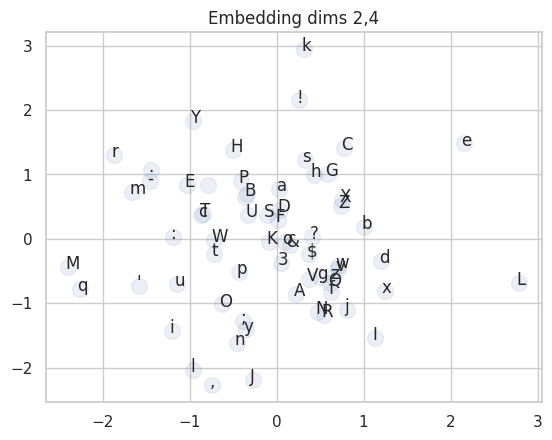

In [245]:
import seaborn as sns
sns.set_context()
sns.set_theme(style='whitegrid')
def plot_char_embeddings(embeddings, char_vocab):
    """
    Plot character embeddings
    """
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots()

    e1,e2=2,4
    a = .03 # adjust this manually based on the scale
    ax.scatter(embeddings[:, e1], embeddings[:, e2], s=130, alpha=.1)
    for i, char in enumerate(char_vocab):
        ax.annotate(char, (embeddings[i, e1]-a, embeddings[i, e2]-a))
    ax.set_title(f'Embedding dims {e1},{e2}')
    plt.show()

embeddings = model.model.token_embedding_table.weight.detach().numpy()
plot_char_embeddings(embeddings, dm.ds_train.vocab)

['\n',
 ' ',
 '!',
 '$',
 '&',
 "'",
 ',',
 '-',
 '.',
 '3',
 ':',
 ';',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']